Ghammara controls the inns and operates enclaves which are legally autonomous, so they can offer sanctuary.

Ghammara sympathizes strongly with Khalashi and their plan to escape the invaders is to migrate to Kal Dorn, the dream world. To do this, they have created a way to record people's dreams and want to use this to find clues about how to enter the dream world permanently.

To process all of the dream data, they will need to write some image processing, machine vision, and computer vision routines.

The tasks might involve edge detection, pattern recognition, image segmentation, perhaps face recognition. As of now I think I'll mostly focus on scikit-image (http://scikit-image.org/docs/dev/auto_examples/) but SimpleCV (simplecv.org) and OpenCV (http://opencv.org/) also look good.

This guy has some notebooks that could be useful: https://github.com/larsyencken/simplecv-demo

In [3]:
import skimage
from PIL import Image
import numpy as np

Let's begin by importing a simple dream image and doing some analysis.

In [84]:
my_dream = Image.open("../../images/dream_one.jpg")
dream_array = np.array(my_dream)

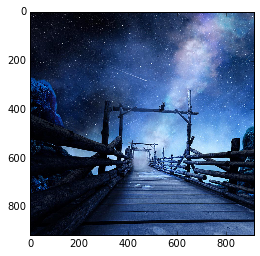

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(dream_array)

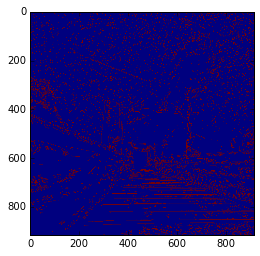

In [90]:
from skimage.feature import canny
from skimage.color import rgb2gray

dream_gray = rgb2gray(dream_array)
edges = canny(rgb2gray(dream_gray))
plt.imshow(edges)

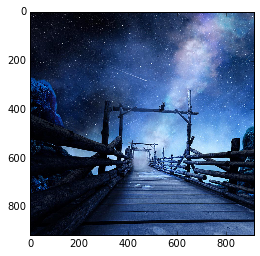

In [35]:
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

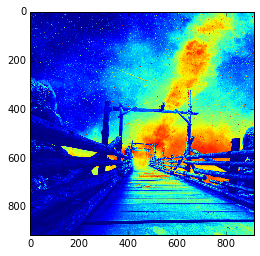

In [92]:
plt.imshow(dream_gray)

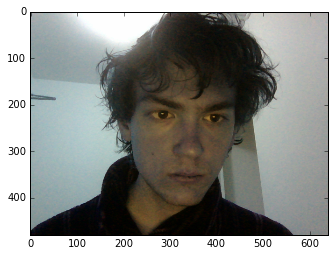

In [12]:
import cv2
camera_port = 0
camera = cv2.VideoCapture(camera_port)
retval, im = camera.read()
del camera
plt.imshow(im)

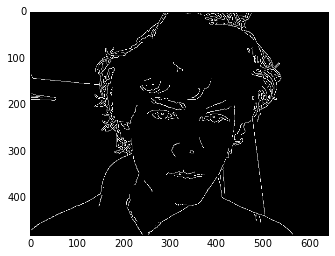

In [35]:
from skimage.feature import canny
from skimage.color import rgb2gray

gray = rgb2gray(im)
edges = canny(gray)
plt.imshow(edges, cmap="gray")

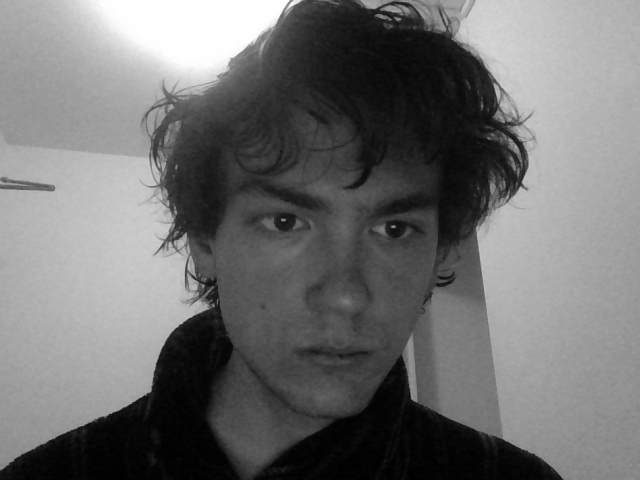

In [42]:
converted.convert("L")

In [4]:
import urllib, cStringIO

URL='http://s5.favim.com/610/54/Favim.com-dream-art-beautiful-fairy-530205.jpg'
file = cStringIO.StringIO(urllib.urlopen(URL).read())
img = Image.open(file)

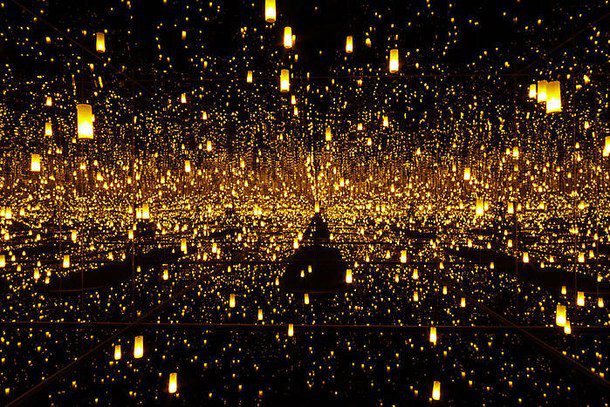

In [5]:
img

In [7]:
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

def detect_blobs(image):
image = np.array(img)
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
plt.tight_layout()

axes = axes.ravel()
for blobs, color, title in sequence:
    ax = axes[0]
    axes = axes[1:]
    ax.set_title(title)
    ax.imshow(image, interpolation='nearest')
    ax.set_axis_off()
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

In [9]:
detect_blobs(image)